In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [85]:
data = pd.read_csv("../../datasets/NFLX.csv")

In [86]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


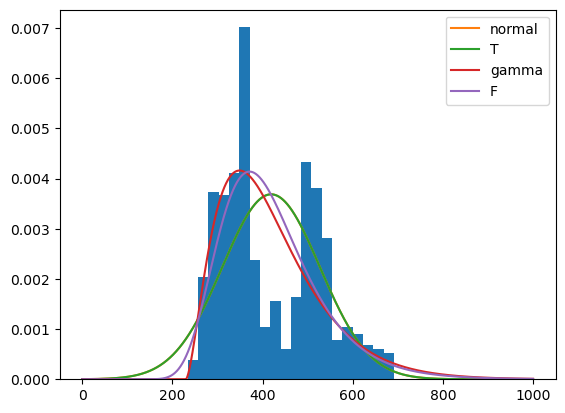

In [91]:
from scipy.stats import norm
from scipy.stats import gamma
from scipy.stats import t
from scipy.stats import f

# Plot between -30 and 30 with
# 0.1 steps.
x_axis = np.arange(0, 1000, 0.1)
  
# Calculating mean and standard 
# deviation
[normean, norstd] = norm.fit(data.Close)
[fdf1, fdf2, floc, fscale] = f.fit(data.Close)
[tdf1, tloc, tscale] = t.fit(data.Close)
[gammadf1, gammaloc, gammascale] = gamma.fit(data.Close)

t_df = len(data.Close) - 1

plt.hist(data.Close,density=True,bins=20)  
plt.plot(x_axis, norm.pdf(x_axis, normean, norstd), label="normal")
plt.plot(x_axis, t.pdf(x_axis,tdf1, tloc, tscale), label="T")
plt.plot(x_axis, gamma.pdf(x_axis,gammadf1, gammaloc, gammascale), label="gamma")
plt.plot(x_axis, f.pdf(x_axis,fdf1, fdf2, floc, fscale), label="F")

plt.legend()